<a href="https://colab.research.google.com/github/TithiB-del/BtechProject/blob/main/garbagedetectionbtechv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!nvidia-smi
# getting gpu access. incase of problems, change runtime to t4 gpu, red

Mon Jun  9 15:32:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
import os
HOME = os.getcwd()
print(HOME)

# get the os ready, red

/content


In [6]:
# installing libraries using pip
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.1/112.6 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 75.0ms
Speed: 3.6ms preprocess, 75.0ms inference, 402.1ms postprocess per image at shape (1, 3, 640, 384)


In [9]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GB0N5LzGc90JigkMkQfo")
project = rf.workspace("btechproject-90eja").project("garbagedetectionv1")
version = project.version(9)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [10]:
%cd {HOME}/datasets/garbagedetectionv1-9
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=20 plots=True

/content/datasets/garbagedetectionv1-9
100% 6.25M/6.25M [00:00<00:00, 64.2MB/s]
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pat

/content


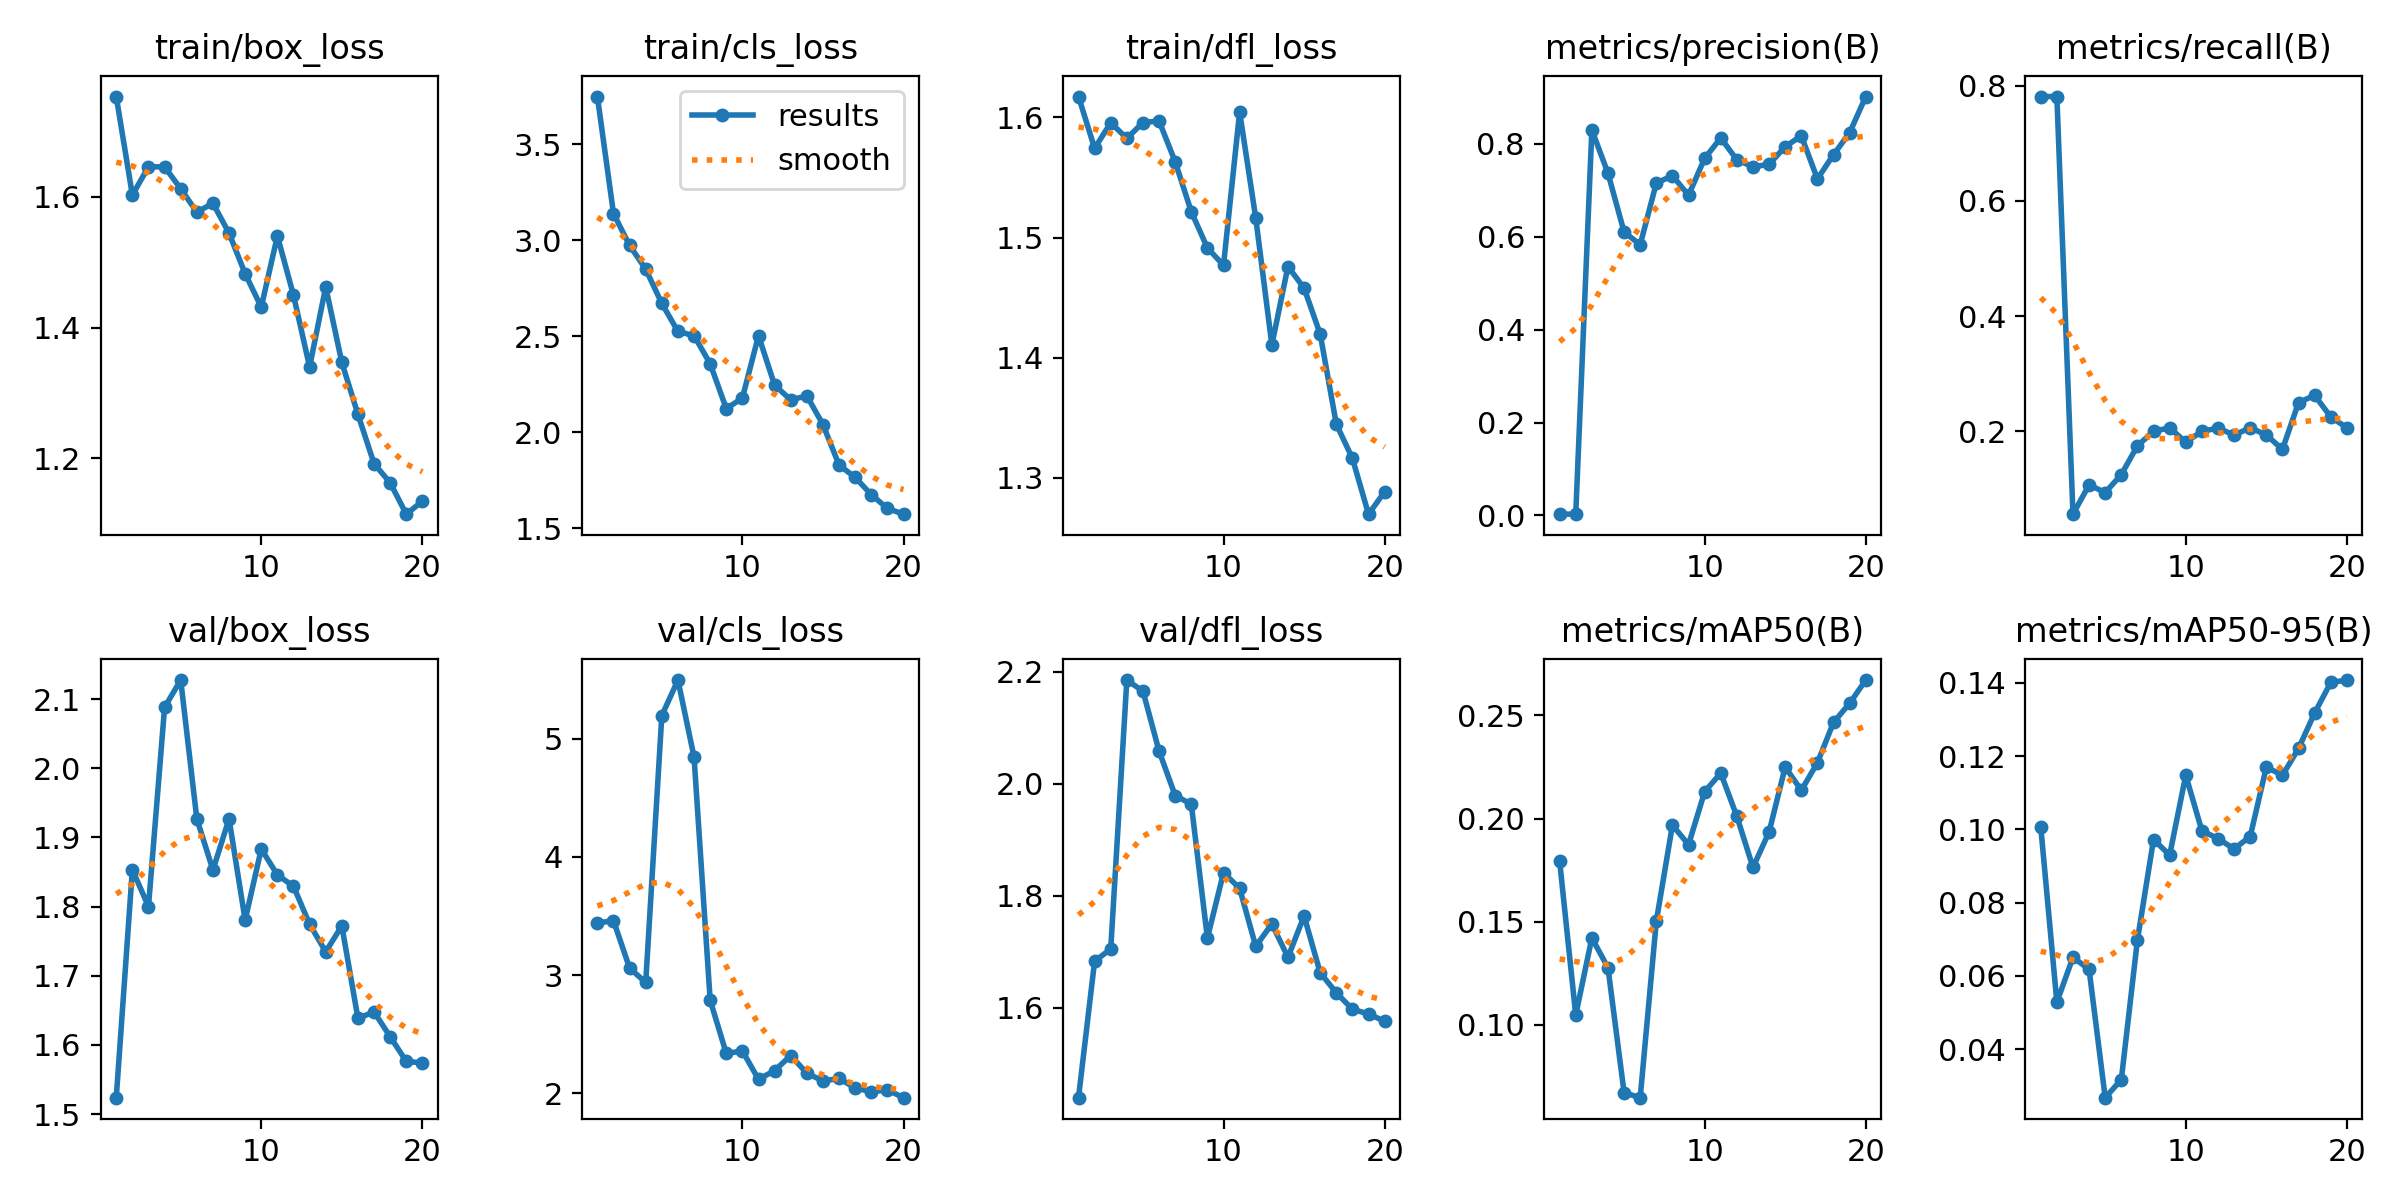

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/garbagedetectionv1-9/runs/detect/train/results.png', width=600)

/content


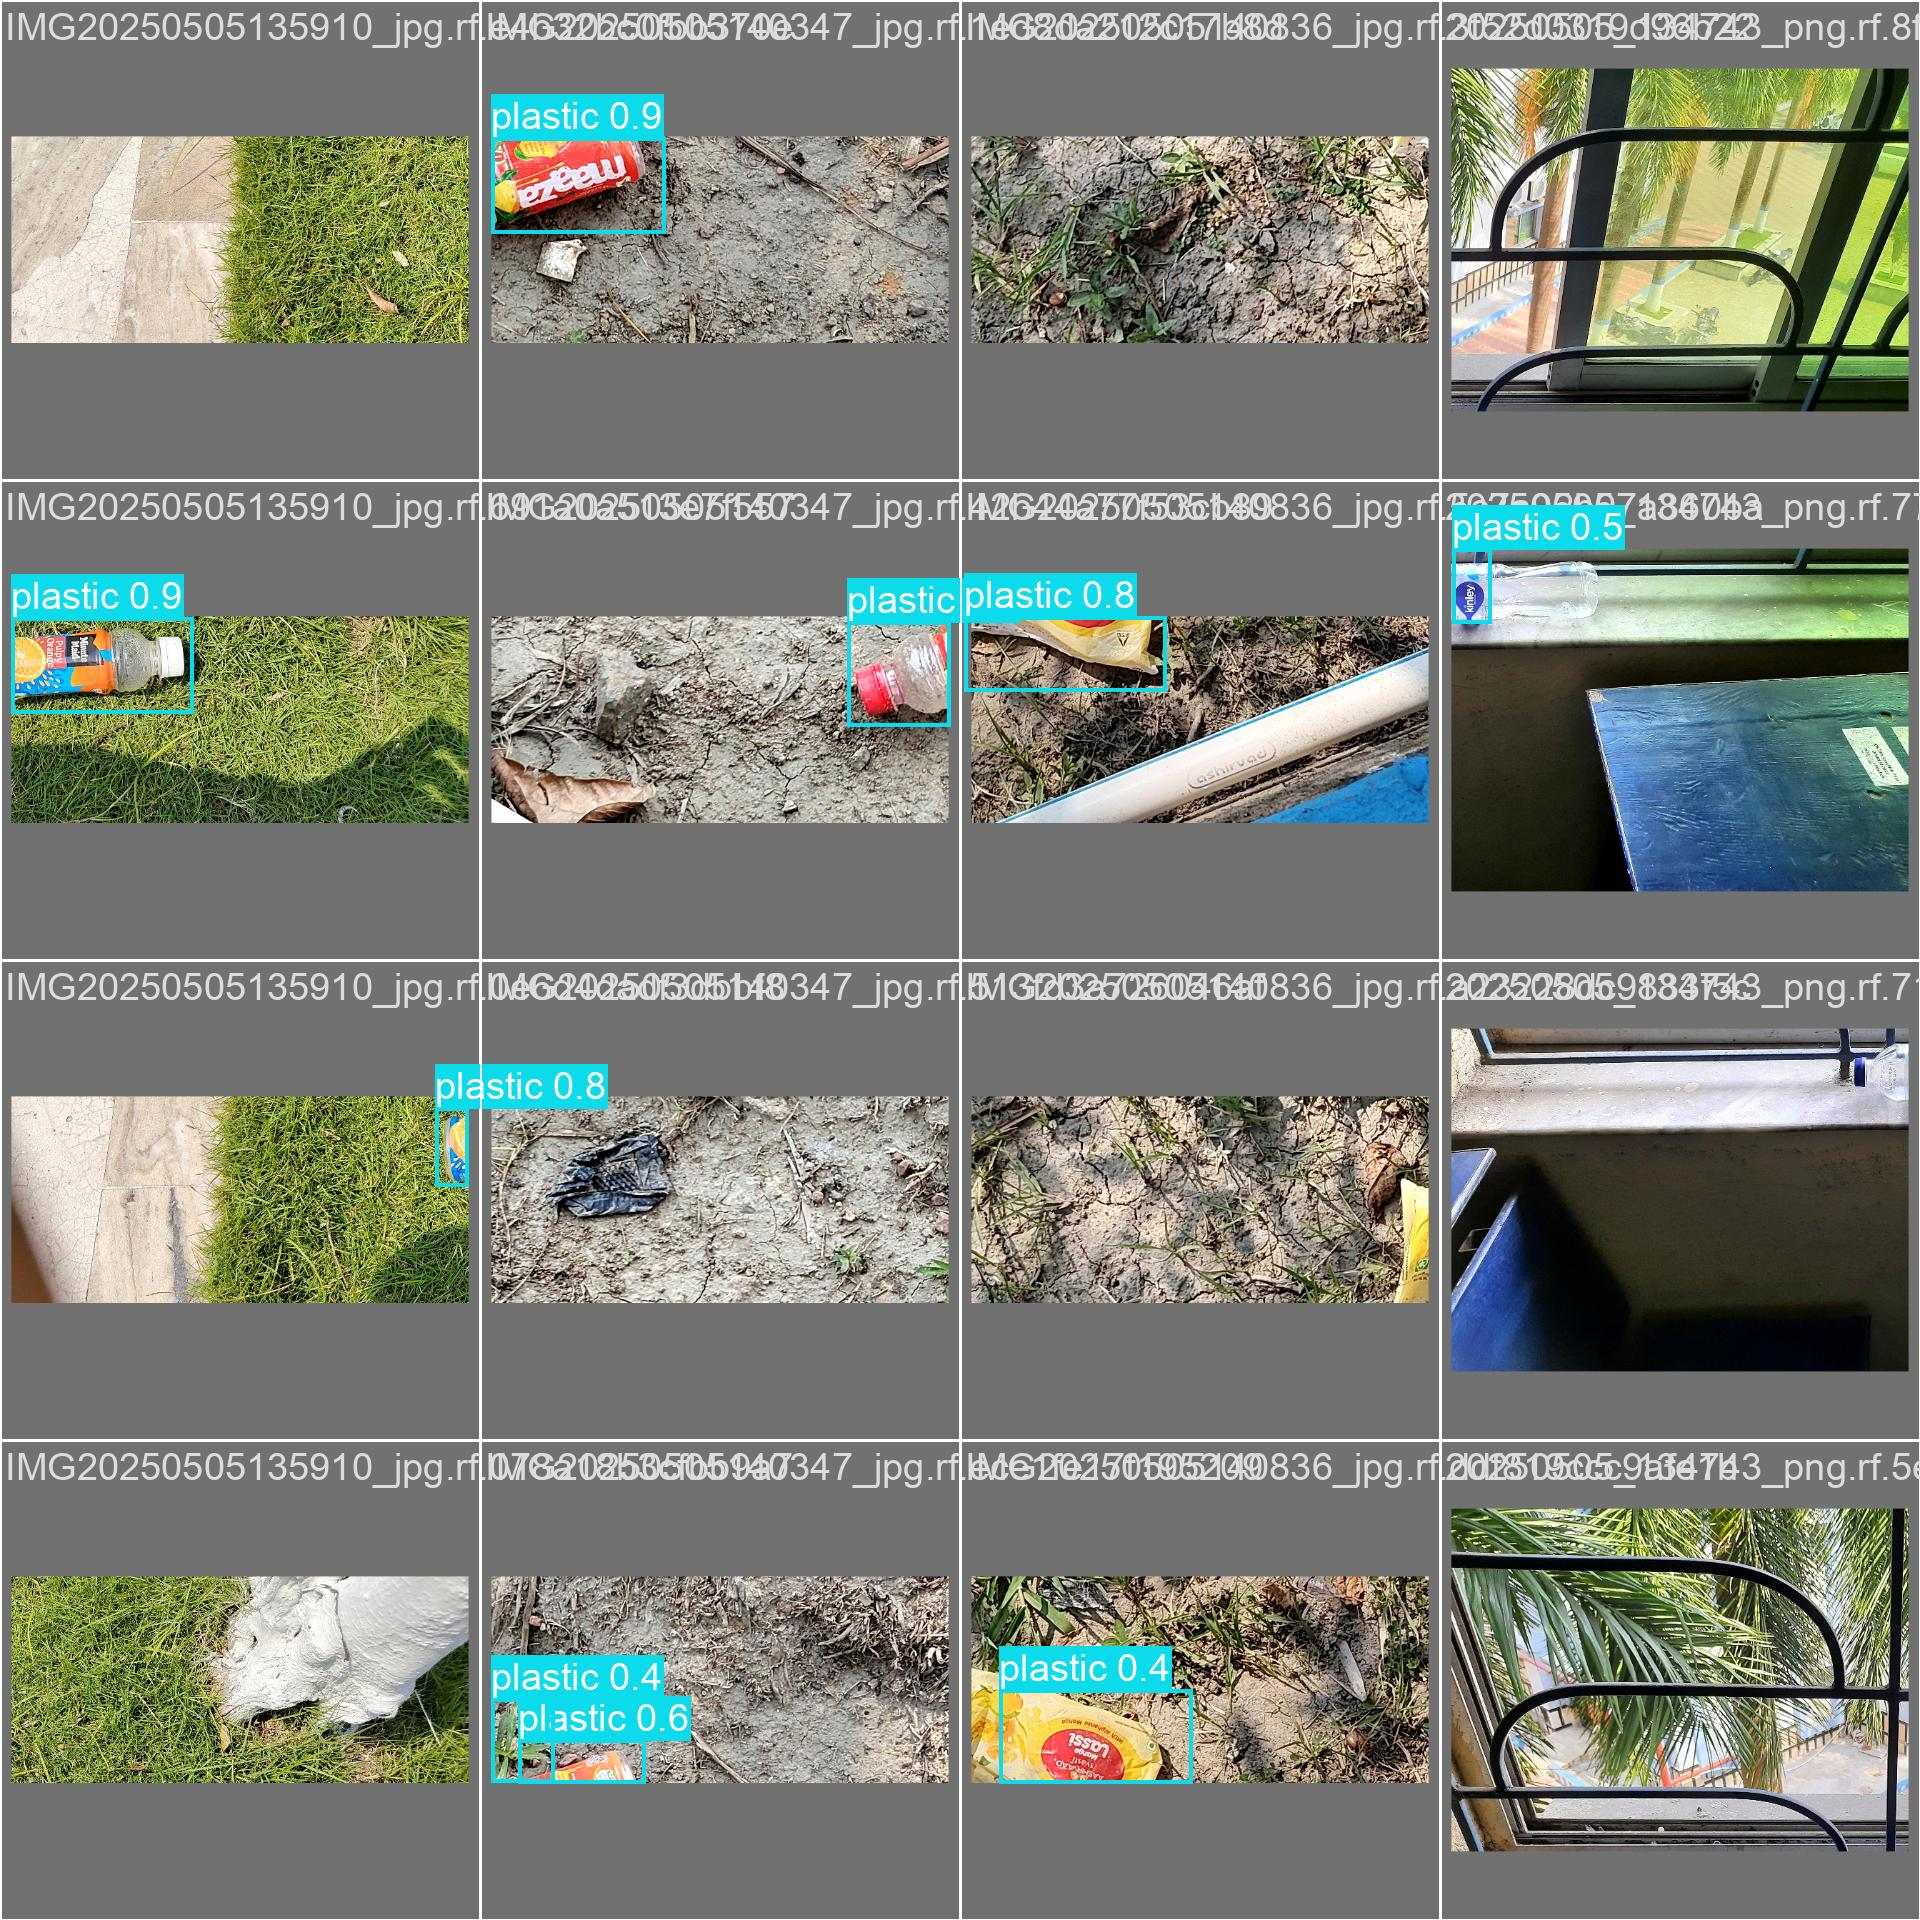

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/garbagedetectionv1-9/runs/detect/train/val_batch0_pred.jpg', width=600)

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/datasets/garbagedetectionv1-9/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/32 /content/datasets/garbagedetectionv1-9/test/images/20250505_134620_png.rf.3d664a98fb317aabf3633fe1dae2ae80.jpg: 640x480 (no detections), 55.4ms
image 2/32 /content/datasets/garbagedetectionv1-9/test/images/20250505_134620_png.rf.d0916720a2a1fbf4cd07e7b747667397.jpg: 640x480 2 plastics, 9.9ms
image 3/32 /content/datasets/garbagedetectionv1-9/test/images/20250505_134620_png.rf.ecb4bdece3713eb2f78fdb778033dfd9.jpg: 640x480 (no detections), 12.2ms
image 4/32 /content/datasets/garbagedetectionv1-9/test/images/20250505_134620_png.rf.f4d8339b790126fec33de57a9ddad1f9.jpg: 640x480 (no detections), 17.6ms
image 5/32 /content/datasets/garbagedetectionv1-9/test/images/20250505_140254_png.rf.4ad8871b567008719f09b1cff1861493.jpg: 480x640 2 plastics, 46.1ms
image 6/32 /content/datasets/garbagedetectionv1-9/test/images/2

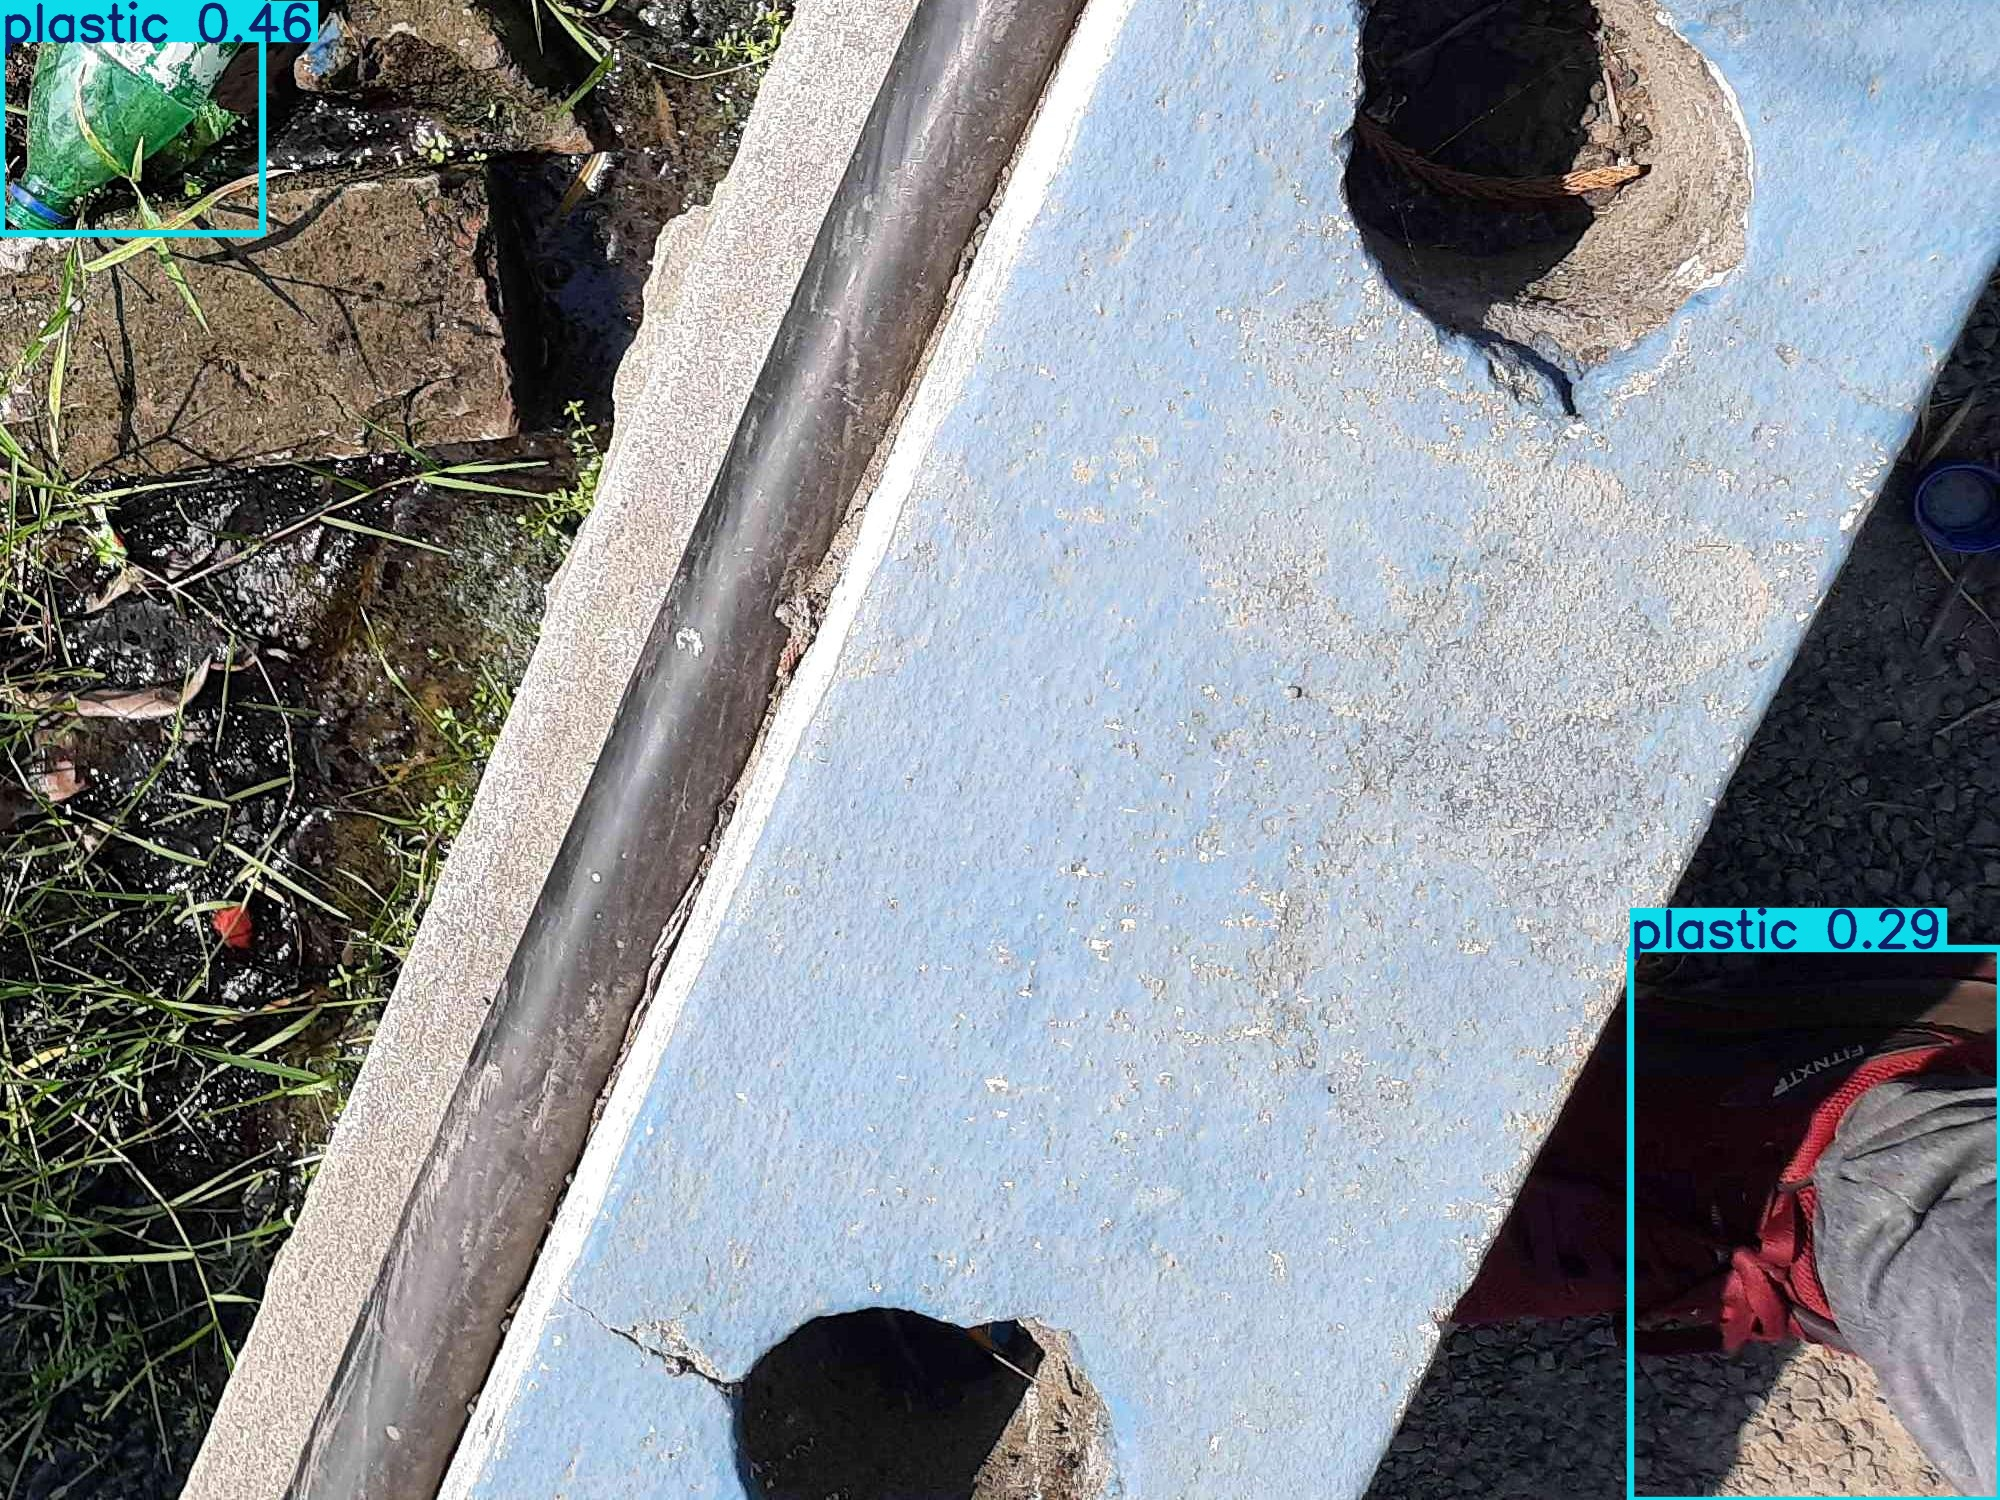

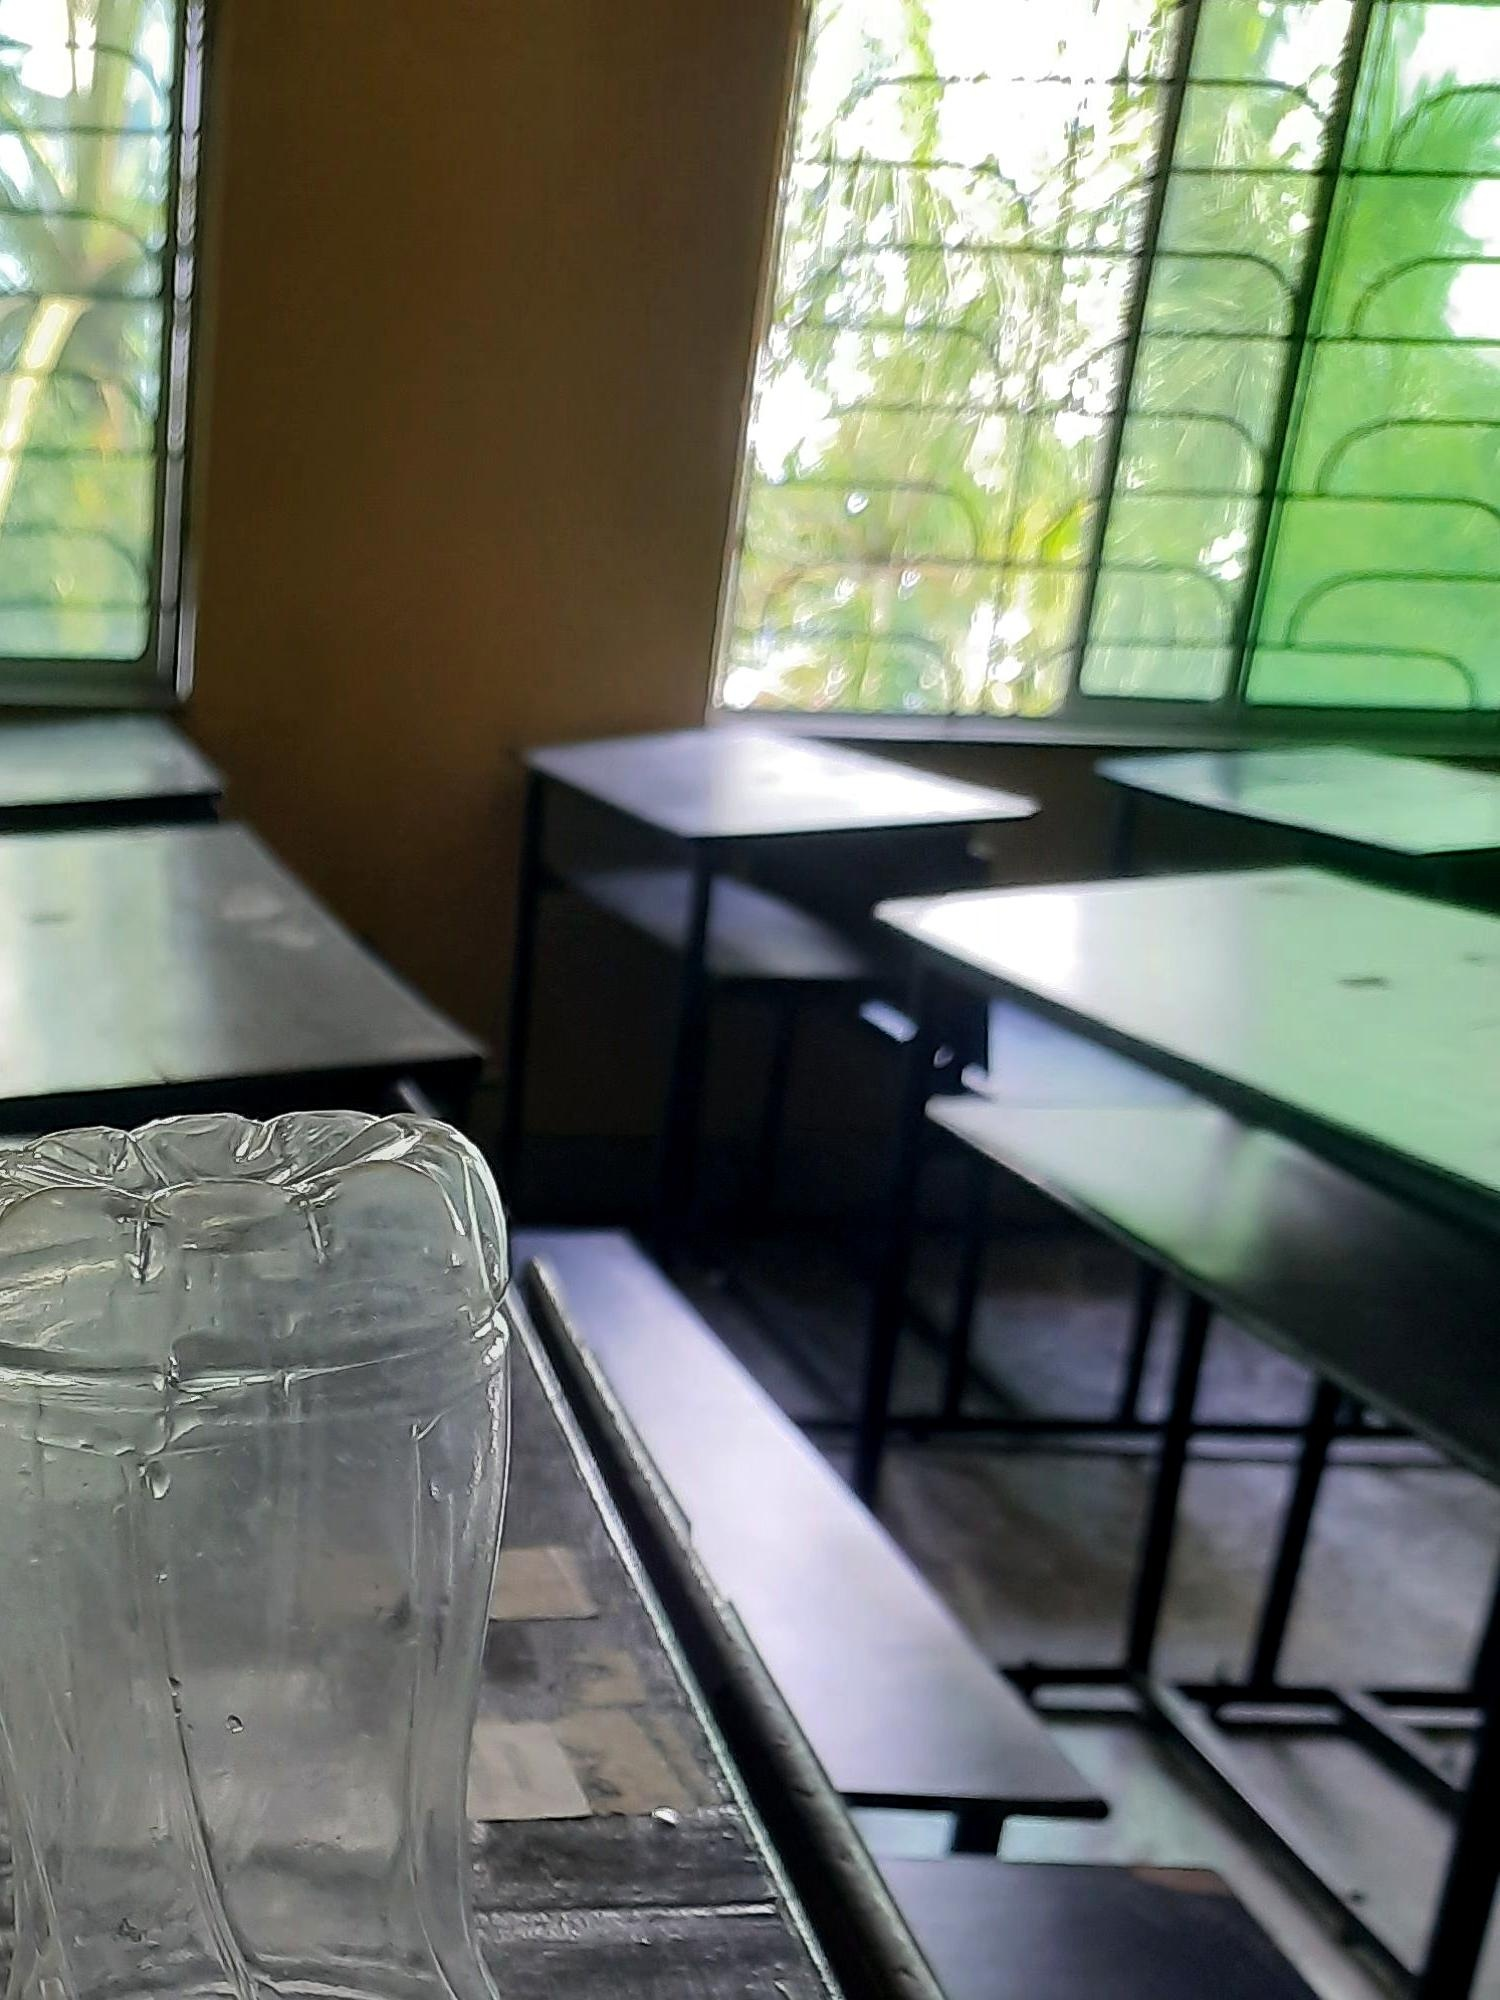

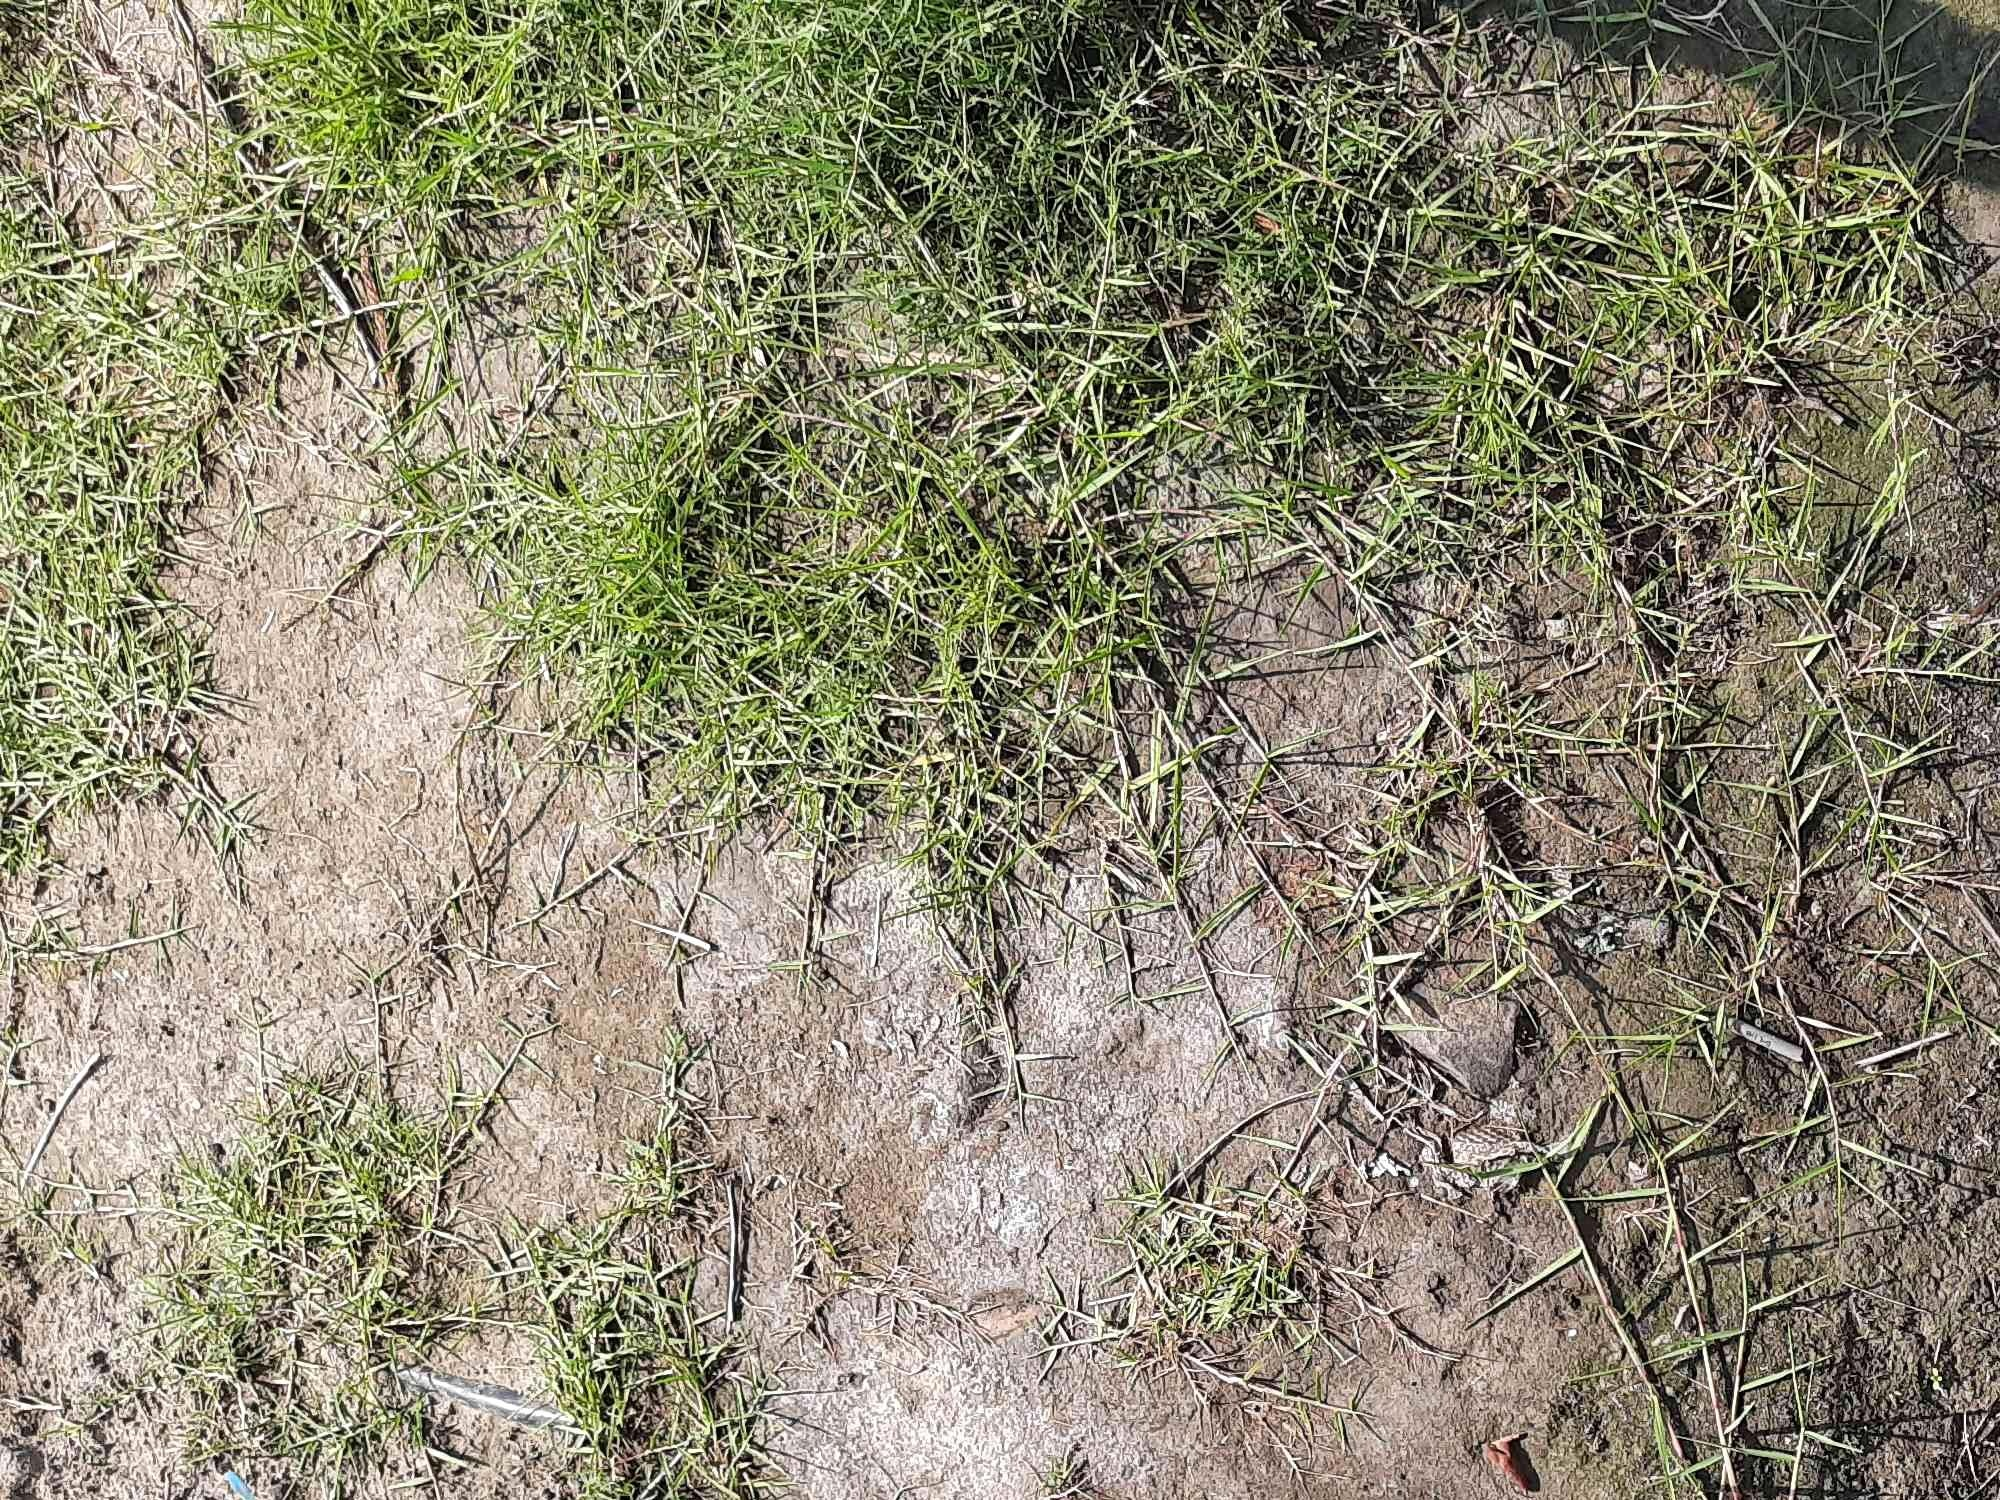

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")